# IMPORTS

In [1]:
import h5py
import os
import numpy as np
import scipy.io
from PIL import Image
import sys
sys.path.append("../utils/")
from nsd_access.nsda import NSDAccess

In [2]:
nsd_expdesign = scipy.io.loadmat('../../nsd/nsddata/experiments/nsd/nsd_expdesign.mat')
sharedix = nsd_expdesign['sharedix'] -1 
nsda = NSDAccess('../../nsd/')
stims_ave = np.load(f'../../mrifeat/subj01/subj01_stims_ave.npy')
sf = h5py.File(nsda.stimuli_file, 'r')
sdataset = sf.get('imgBrick')

# 1. REPRODUCE CHOSEN IMAGE RANDOM

In [3]:
# OUTPUT DIR: f'../../decoded/image-{method}/{subject}/'

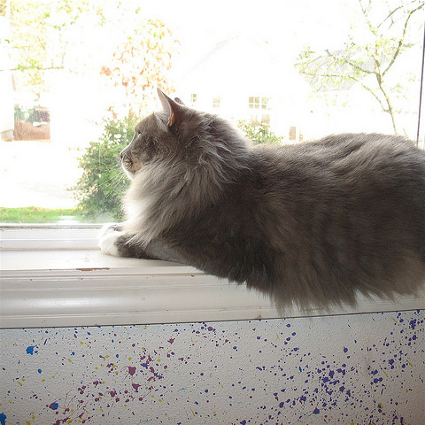

In [15]:
#imgidx = 0             # Please be from 0-981
imgidx = np.random.randint(low=0, high=981)

tr_idx = np.zeros_like(stims_ave)
for idx, s in enumerate(stims_ave):
    if s in sharedix:
        tr_idx[idx] = 0
    else:
        tr_idx[idx] = 1
        
imgidx_te = np.where(tr_idx==0)[0][imgidx] # Extract test image index
idx73k= stims_ave[imgidx_te]
        
Image.fromarray(np.squeeze(sdataset[idx73k,:,:,:]).astype(np.uint8))

# GENERATION FROM PAPERS MODEL

In [16]:
command = f"python3 diffusion_decoding.py --imgidx {imgidx} --gpu 0 --subject subj01 --method cvpr"
os.system(command)

Global seed set to 42
Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.16.mlp.fc1.bias', 'vision_model.encoder.layers.5.mlp.fc2.weight', 'vision_model.encoder.layers.16.self_attn.k_proj.bias', 'vision_model.encoder.layers.5.self_attn.out_proj.bias', 'vision_model.encoder.layers.21.layer_norm2.bias', 'vision_model.encoder.layers.8.mlp.fc1.weight', 'vision_model.encoder.layers.16.self_attn.out_proj.bias', 'vision_model.encoder.layers.0.mlp.fc2.bias', 'vision_model.encoder.layers.13.self_attn.v_proj.bias', 'vision_model.encoder.layers.14.mlp.fc2.weight', 'vision_model.encoder.layers.20.self_attn.v_proj.weight', 'vision_model.encoder.layers.6.mlp.fc2.weight', 'vision_model.encoder.layers.9.layer_norm2.weight', 'vision_model.encoder.layers.4.mlp.fc1.weight', 'vision_model.encoder.layers.8.mlp.fc2.bias', 'vision_model.encoder.layers.17.self_attn.k_proj.weight', 'vision_model.encoder.layers.23.se

Loading model from ./stable-diffusion/models/ldm/stable-diffusion-v1/sd-v1-4.ckpt
Global Step: 470000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels
target t_enc is 40 steps
Running DDIM Sampling with 40 timesteps


Decoding image:   0%|          | 0/40 [00:00<?, ?it/s]

Running DDIM Sampling with 40 timesteps



Decoding image:   0%|          | 0/40 [00:00<?, ?it/s]

Running DDIM Sampling with 40 timesteps



Decoding image:   0%|          | 0/40 [00:00<?, ?it/s]

Running DDIM Sampling with 40 timesteps



Decoding image:   0%|          | 0/40 [00:00<?, ?it/s]

Running DDIM Sampling with 40 timesteps



Sampling: 100%|██████████| 5/5 [00:10<00:00,  2.04s/it]


0

# GENERATION FROM OUR MODEL

In [ ]:
command = f"python3 diffusion_decoding_l1.py --imgidx {imgidx} --gpu 0 --subject subj01 --method cvpr"
os.system(command)

In [ ]:
# !python3 diffusion_decoding_l1.py --imgidx 80 --gpu 0 --subject subj01 --method cvpr